In [2]:
import numpy as np 
import pandas as pd
import tensorflow as tf
import os
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageEnhance
import albumentations as albu
from tqdm.notebook import tqdm

import sys
sys.path.append('./')
from visualize import *
from data_parser import *
import cv2
import re
import time

In [6]:
# src_path = '/home/Dataset/Papsmear/original'
# df = pd.DataFrame(columns=['label', 'org_label', 'bbox', 'xmin','ymin','xmax','ymax', 'xmlh', 'xmlw', 'file_name', 'path'])
# # df = pd.DataFrame(columns=['class','bbox', 'path'])
# data_list = []
# for dir_name in ['SS', 'SS2']:
#     dpath = os.path.join(src_path, dir_name)
# #     print(dpath)
#     dir_lists = os.listdir(dpath) 
# #     print(dir_lists)
    
#     for dir_list in dir_lists :
#         dpath2 = os.path.join(dpath, dir_list)
#         xml_list = [os.path.join(dpath2, d) for d in os.listdir(dpath2) if d.endswith(".xml")]
# #         print(xml_list)
#         for xml_path in xml_list :
#             parser = XMLParser(xml_path)
#             if (parser.height, parser.width) not in parser.rejection_size:  
#                 filename = parser.file_name
#                 for obj in parser.objects :
#                     obj_class = obj[0]
#                     if obj_class in rej_table :
#                         continue
                    
#                     img_path = '/'.join((xml_path.split('/')[:-1])) + '/' + filename
#     #                 img_path = re.sub('xml', 'jpg', xml_path)
#     # #                     print(img_path)
#                     obj.append(parser.height)
#                     obj.append(parser.width)
#                     obj.append(parser.file_name)
#                     obj.append(img_path)
#                     data_list.append(obj)
#     # #                     print(obj)


In [ ]:
# df = pd.DataFrame(data_list,columns=['label', 'org_label', 'bbox', 'xmin','ymin','xmax','ymax', 'xmlh', 'xmlw', 'file_name', 'path'])
# df = df[['file_name', 'xmlh','xmlw', 'bbox', 'xmin', 'ymin', 'xmax', 'ymax', 'label', 'org_label', 'path', ]]
# df.reset_index(drop=True, inplace=True)
# df.head()

In [ ]:
# df.label = df.label.apply(lambda x : np.nan if str(x) == '' else x)
# df.dropna(subset=['label'], inplace=True)
# df.reset_index(drop=True, inplace=True)
# df.shape

In [7]:
# path = df[df['xmlh'] == 1960]['path'].values[22000]
# image = cv2.imread(path)
# image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# h, w, _ = image.shape
# print(image.shape)

In [ ]:
# def get_hw (row) :
#     path = row['path']
#     image = cv2.imread(path)
#     h, w, _ = image.shape
#     return (h, w)

# # df = df[:2000]

# start_time = time.time()
# df[['res']] = df.apply(lambda x : get_hw(x), axis=1)
# print((time.time() - start_time))


In [ ]:
# df['h'] = df.res.apply(lambda x : str(x).split(',')[0][1:])
# df['w'] = df.res.apply(lambda x : str(x).split(',')[1][:-1])
# # df['width'] = df.apply(lambda x : )
df.to_csv('df.csv', index=None)

In [3]:
df = pd.read_csv('df.csv')
df['xdiff'] = df.apply(lambda x : x['xmax'] - x['xmin'], axis=1)
df['ydiff'] = df.apply(lambda x : x['ymax'] - x['ymin'], axis=1)
df['area'] = df.apply(lambda x : x['xdiff'] * x['ydiff'], axis=1)
df['format'] = df.file_name.apply(lambda x : x.split('.')[-1])
 
df = df[['file_name', 'xmlh', 'xmlw', 'res', 'h', 'w', 'xdiff', 'ydiff',
       'area', 'bbox', 'xmin', 'ymin', 'xmax', 'ymax',
       'label', 'org_label', 'format', 'path']]
df.head()

,file_name,xmlh,xmlw,res,h,w,xdiff,ydiff,area,bbox,xmin,ymin,xmax,ymax,label,org_label,format,path
0,20200623_100015.jpg,1960,4032,"(4032, 1960)",4032,1960,117,124,14508,"[2061, 1051, 2178, 1175]",2061,1051,2178,1175,Carcinoma,Suamous cell carcinoma,jpg,/home/Dataset/Papsmear/original/SS/06/20200623...
1,20200420_100401.jpg,1960,4032,"(4032, 1960)",4032,1960,79,71,5609,"[1945, 870, 2024, 941]",1945,870,2024,941,HSIL,HSIL,jpg,/home/Dataset/Papsmear/original/SS/06/20200420...
2,20200420_100401.jpg,1960,4032,"(4032, 1960)",4032,1960,84,73,6132,"[2400, 947, 2484, 1020]",2400,947,2484,1020,HSIL,HSIL,jpg,/home/Dataset/Papsmear/original/SS/06/20200420...
3,20200420_100401.jpg,1960,4032,"(4032, 1960)",4032,1960,98,67,6566,"[2209, 845, 2307, 912]",2209,845,2307,912,HSIL,HSIL,jpg,/home/Dataset/Papsmear/original/SS/06/20200420...
4,20200420_100401.jpg,1960,4032,"(4032, 1960)",4032,1960,88,55,4840,"[2056, 811, 2144, 866]",2056,811,2144,866,HSIL,HSIL,jpg,/home/Dataset/Papsmear/original/SS/06/20200420...


In [4]:
# path = (df[df['format'] == 'png']).path.values[0]

In [5]:
set(df.res)
len((df[(df['h'] != df['xmlh'])]).file_name.unique())
len(df.file_name.unique())

18554

In [6]:
# df[df['xmax'] < df['xmin']]
# df[df['ymax'] < df['ymin']]
df.describe()
 

,xmlh,xmlw,h,w,xdiff,ydiff,area,xmin,ymin,xmax,ymax
count,100894.000000,100894.000000,100894.000000,100894.000000,100894.000000,100894.000000,100894.000000,100894.000000,100894.000000,100894.000000,100894.000000
mean,1852.097449,3725.656471,3711.563978,1866.189942,87.903919,92.862370,8694.456905,1967.549359,842.822725,2055.453278,935.685095
std,131.927698,783.284059,812.191494,153.926511,28.218490,29.640891,5452.846543,489.260439,302.218478,486.539818,302.808156
min,1560.000000,1632.000000,1560.000000,1632.000000,0.000000,1.000000,0.000000,2.000000,1.000000,61.000000,63.000000
25%,1800.000000,4000.000000,4000.000000,1800.000000,68.000000,72.000000,5025.000000,1844.000000,648.000000,1928.000000,738.000000
50%,1960.000000,4032.000000,4032.000000,1960.000000,84.000000,88.000000,7396.000000,2068.000000,855.000000,2161.000000,952.000000
75%,1960.000000,4032.000000,4032.000000,1960.000000,103.000000,109.000000,10830.000000,2257.000000,1036.000000,2343.000000,1130.000000
max,1960.000000,4032.000000,4032.000000,4000.000000,333.000000,435.000000,142191.000000,3132.000000,1849.000000,3171.000000,1959.000000


In [7]:
print(df.shape)
df = df[df['xdiff'] > 25]
df = df[df['ydiff'] > 25]
df = df[df['area'] > 1000]
print(df.shape)
df.reset_index(drop=True, inplace=True)
# df.head()

(100894, 18)
(100871, 18)


In [8]:
set(df.label)

{'ASCUS', 'Carcinoma', 'HSIL', 'LSIL', 'Normal'}

In [8]:
# df[df['area'] > 100000]
df[df['label'] == 'Carcinoma'].describe()

,xmlh,xmlw,h,w,xdiff,ydiff,area,xmin,ymin,xmax,ymax
count,21848.000000,21848.000000,21848.000000,21848.000000,21848.000000,21848.000000,21848.000000,21848.000000,21848.000000,21848.000000,21848.000000
mean,1945.294764,4029.058953,4029.058953,1945.294764,96.448416,103.487321,10455.528607,2110.143949,864.602115,2206.592365,968.089436
std,46.224362,9.244872,9.244872,46.224362,29.184687,31.328821,6382.384188,266.965404,294.736196,266.829763,296.408948
min,1800.000000,4000.000000,4000.000000,1800.000000,33.000000,30.000000,1230.000000,1070.000000,16.000000,1175.000000,121.000000
25%,1960.000000,4032.000000,4032.000000,1960.000000,76.000000,83.000000,6643.000000,1953.000000,676.000000,2047.000000,773.000000
50%,1960.000000,4032.000000,4032.000000,1960.000000,92.000000,98.000000,8910.000000,2110.000000,875.500000,2210.000000,983.000000
75%,1960.000000,4032.000000,4032.000000,1960.000000,110.000000,118.000000,12168.000000,2274.000000,1055.000000,2368.000000,1160.000000
max,1960.000000,4032.000000,4032.000000,1960.000000,333.000000,435.000000,142191.000000,3095.000000,1776.000000,3171.000000,1926.000000


In [7]:
df[df['label'] == 'Normal'].describe()

,xmlh,xmlw,h,w,xdiff,ydiff,area,xmin,ymin,xmax,ymax
count,25590.000000,25590.000000,25590.000000,25590.000000,25590.000000,25590.000000,25590.000000,25590.000000,25590.000000,25590.000000,25590.000000
mean,1846.743259,4009.348652,4009.348652,1846.743259,65.172177,68.021805,4533.642399,2160.573075,858.603126,2225.745252,926.624932
std,72.761226,14.552245,14.552245,72.761226,14.745785,14.593214,1785.347675,338.935902,342.724790,338.132977,342.693448
min,1800.000000,4000.000000,4000.000000,1800.000000,26.000000,27.000000,1054.000000,1066.000000,14.000000,1145.000000,63.000000
25%,1800.000000,4000.000000,4000.000000,1800.000000,55.000000,58.000000,3300.000000,1920.000000,610.250000,1986.000000,677.000000
50%,1800.000000,4000.000000,4000.000000,1800.000000,64.000000,67.000000,4256.000000,2165.000000,865.000000,2228.000000,932.000000
75%,1960.000000,4032.000000,4032.000000,1960.000000,74.000000,77.000000,5451.000000,2404.000000,1111.000000,2470.000000,1178.000000
max,1960.000000,4032.000000,4032.000000,1960.000000,183.000000,195.000000,35502.000000,3120.000000,1849.000000,3168.000000,1921.000000


In [10]:
df.head()

,file_name,xmlh,xmlw,res,h,w,xdiff,ydiff,area,bbox,xmin,ymin,xmax,ymax,label,org_label,path
0,20200623_100015.jpg,1960,4032,"(4032, 1960)",4032,1960,117,124,14508,"[2061, 1051, 2178, 1175]",2061,1051,2178,1175,Carcinoma,Suamous cell carcinoma,/home/Dataset/Papsmear/original/SS/06/20200623...
1,20200420_100401.jpg,1960,4032,"(4032, 1960)",4032,1960,79,71,5609,"[1945, 870, 2024, 941]",1945,870,2024,941,HSIL,HSIL,/home/Dataset/Papsmear/original/SS/06/20200420...
2,20200420_100401.jpg,1960,4032,"(4032, 1960)",4032,1960,84,73,6132,"[2400, 947, 2484, 1020]",2400,947,2484,1020,HSIL,HSIL,/home/Dataset/Papsmear/original/SS/06/20200420...
3,20200420_100401.jpg,1960,4032,"(4032, 1960)",4032,1960,98,67,6566,"[2209, 845, 2307, 912]",2209,845,2307,912,HSIL,HSIL,/home/Dataset/Papsmear/original/SS/06/20200420...
4,20200420_100401.jpg,1960,4032,"(4032, 1960)",4032,1960,88,55,4840,"[2056, 811, 2144, 866]",2056,811,2144,866,HSIL,HSIL,/home/Dataset/Papsmear/original/SS/06/20200420...


In [9]:
df = df[df['label'] != 'Normal']
df.reset_index(drop=True, inplace=True)
df.shape

(75281, 18)

In [14]:
df_path = df.groupby('path')
path_list = list(set(df.path))
labels_info = {} 

for path in path_list :
    small_df = df_path.get_group(path)
    p = path.split('/original/')[-1]
    label = small_df[['label', 'xmin', 'ymin', 'xmax', 'ymax']].values
    labels_info[p] = label


In [16]:
np.save('../data/labels_info.npy', labels_info)

In [15]:
labels_info

{'SS/08(200904)/20200727_103625.jpg': array([['Carcinoma', 2001, 368, 2063, 459],
        ['Carcinoma', 2032, 471, 2126, 554],
        ['Carcinoma', 2218, 865, 2306, 974],
        ['Carcinoma', 2019, 586, 2124, 684],
        ['Carcinoma', 2161, 534, 2242, 626],
        ['Carcinoma', 2156, 1079, 2240, 1170],
        ['Carcinoma', 1899, 1159, 2011, 1266],
        ['Carcinoma', 1663, 832, 1761, 927],
        ['Carcinoma', 2345, 973, 2463, 1061],
        ['Carcinoma', 2315, 874, 2399, 969],
        ['Carcinoma', 2279, 738, 2388, 864],
        ['Carcinoma', 2536, 808, 2640, 911],
        ['Carcinoma', 2664, 692, 2759, 790],
        ['Carcinoma', 2774, 690, 2858, 812],
        ['Carcinoma', 2592, 950, 2684, 1038],
        ['Carcinoma', 2469, 1036, 2561, 1113],
        ['Carcinoma', 2284, 1157, 2393, 1248],
        ['Carcinoma', 1808, 817, 1899, 936],
        ['Carcinoma', 2011, 1396, 2080, 1520],
        ['Carcinoma', 2184, 1482, 2264, 1566],
        ['Carcinoma', 2221, 1565, 2301, 1666],
  

In [63]:
set(df.res)

{'(1560, 1632)', '(1800, 4000)', '(4000, 1800)', '(4032, 1960)'}

/home/Dataset/Papsmear/original/SS/03/20200409_135014.jpg
(4032, 1960, 3)
(1960, 4032, 3)


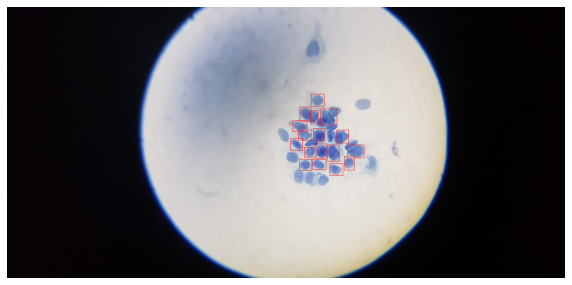

In [72]:
# #  아래 2개 색이 다르다 why????
# large_normal_list = df[(df['label'] != 'Normal') & (df['area'] > 80000)].path.values
# path = large_normal_list[3]
# path = large_normal_list[4]

# path = path_list[0]
# path = df[df['xmlh'] == 1800]['path'].values[0]
# path = list(df1[df1['w'] == 1632]['path'])[0]
# path = list(df[df['h'] == 4032]['path'])[71]
path = df[df['h'] == 4032].path.values[5000]
print(path)
image = cv2.imread(path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
h, w, _ = image.shape
print(image.shape)

if h == 1560 or h == 1800 :
    pass
else :
    image = cv2.flip(image, 1)
    pass
my_df = df[df['path'] == path].copy()
my_df.reset_index(inplace=True)
new_bboxes = []
for i in range(len(my_df)) :
    xmin, ymin, xmax, ymax = my_df.loc[i, 'xmin'], my_df.loc[i, 'ymin'], my_df.loc[i, 'xmax'], my_df.loc[i, 'ymax']
#     if h == 1560 or h == 1800 :
#         new_bboxes.append([xmin, ymin, xmax, ymax])
#     else :
#         new_bboxes.append([ymin, xmin, ymax, xmax])
    new_bboxes.append([xmin, ymin, xmax, ymax])    
if h == 1560 or h == 1800 :
    pass
else :
    image = np.transpose(image, (1, 0, 2))       
    pass

print(image.shape)
visualize(image, new_bboxes)

In [25]:
set(df.oh)

{1560, 1800, 1960}

/home/Dataset/Papsmear/original/SS/04/20200518_110859.png
(1560, 1632, 3)
(1560, 1632, 3)


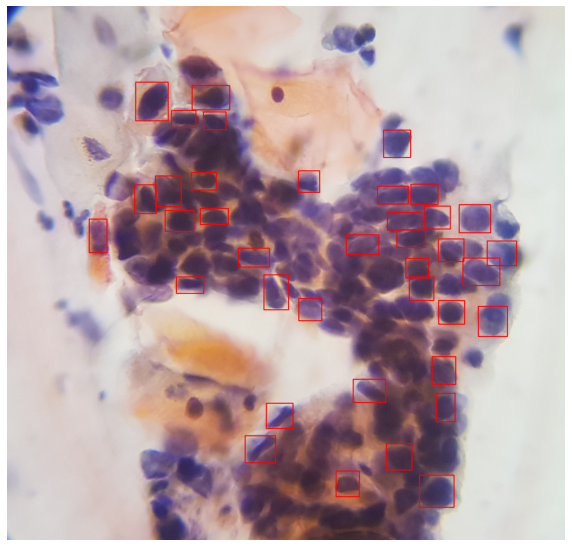

In [44]:
# path = large_normal_list[200]
# path = list(df1[df1['w'] == 1632]['path'])[0]
# path = list(df[df['oh'] == 1960]['path'])[71]
# path = df[df['xdiff'] < 5].path.values[0]
# path = df[df['area'] > 100000].path.values[0]
# path = df[(df['label'] == 'Normal') & (df['area'] > 30000)].path.values[0]
path = (df[df['format'] == 'png']).path.values[1200]
print(path)
image = cv2.imread(path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
h, w, _ = image.shape
print(image.shape)

if h == 1560 or h == 1800 :
    pass
else :
    image = cv2.flip(image, 1)
    pass
my_df = df[df['path'] == path].copy()
my_df.reset_index(inplace=True)
new_bboxes = []
for i in range(len(my_df)) :
    xmin, ymin, xmax, ymax = my_df.loc[i, 'xmin'], my_df.loc[i, 'ymin'], my_df.loc[i, 'xmax'], my_df.loc[i, 'ymax']
#     if h == 1560 or h == 1800 :
#         new_bboxes.append([xmin, ymin, xmax, ymax])
#     else :
#         new_bboxes.append([ymin, xmin, ymax, xmax])
    new_bboxes.append([xmin, ymin, xmax, ymax])    
if h == 1560 or h == 1800 :
    pass
else :
    image = np.transpose(image, (1, 0, 2))       
    pass

print(image.shape)
visualize(image, new_bboxes)